
# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1-‘ScheduledDay’ tells us on what day the patient set up their appointment.

2-‘Neighborhood’ indicates the location of the hospital.

3-‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

4-Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if      they did not show up.
 

### Question(s) for Analysis

What is the most independent factors that affect the showing of the patients?:
Does the age affect the showing of the patients?
Does the SMS_recevied affect the showing of the patients?
Does the gender affect the showing of the patients?
Does the Neighbourhood affect the showing of the patients?
 

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#determine the dimensions of the dataframe
df.shape

(110527, 14)

In [5]:
#determine the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#track the dupliclicates in the data
sum(df.duplicated())

0

In [7]:
#descriptive statistics for each column of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#finding non-sense value in the Age column
df.query('Age=="-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning

In [10]:
#removing any unimportant columns in this analysis
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay'], axis=1, inplace=True)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#removing the non-sense value in the Age column
df.drop(index=99832,inplace=True)

In [12]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


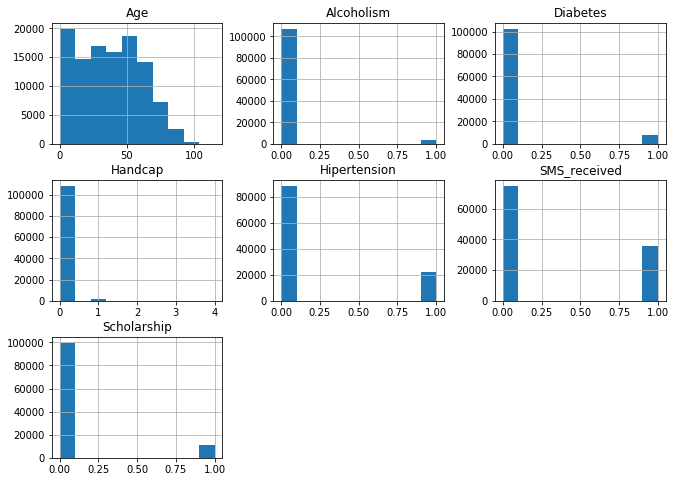

In [13]:
#General histograms to illustrate the dataset 
df.hist(figsize=(11,8));

These histograms observe that the patients who are between 0:5 years approximately and 50s years patients are the most showing ones.
The number of alcholic, diabetic and handicapped people are so small than those who are not diagnosed with it.
Quarter of the patients are diagnosed with Hipertension.
Half of the patients have received the SMS.
Less than 20000 have received the scholarship.

In [14]:
#Make names of values in the No-Show column for clear meaning 
noshow = df['No-show'] == 'Yes' 
show = df['No-show'] == 'No'

### First Question: (Does the age affect the showing of the patients?)

Text(0,0.5,'Patients Num')

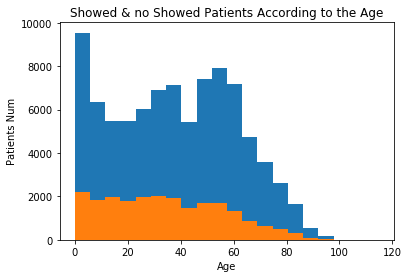

In [15]:
A = df.Age[show]
B = df.Age[noshow]
plt.hist(A, alpha=1, bins=20, label='show')
plt.hist(B, alpha=1, bins=20, label='noshow')
plt.title('Showed & no Showed Patients According to the Age')
plt.xlabel('Age')
plt.ylabel('Patients Num')

It is obvious that the number of the children between 0:5 years approximately is the highest patients that attend then those who are between 50:55 years. 
However, the oldest patients above the 60 years here are the least ones who attend.

### Second Question: (Does the SMS_recevied affect the showing of the patients?)

Text(0,0.5,'Patients Num')

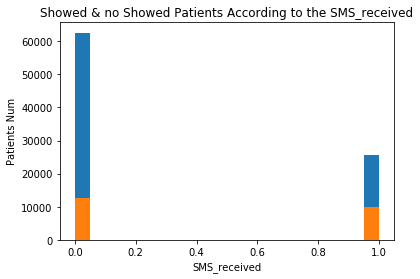

In [16]:
#Comparison Between Showed & no Showed Patients According to the SMS_received
A = df.SMS_received[show]
B = df.SMS_received[noshow]
plt.hist(A, alpha=1, bins=20, label='show')
plt.hist(B, alpha=1, bins=20, label='noshow')
plt.title('Showed & no Showed Patients According to the SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('Patients Num')

It is strange thing that patients who have received the SMS are the highest number of patients who didnot attend. 

### Third Question : ( Does the gender affect the showing of the patients?)

Text(0,0.5,'Patients Num')

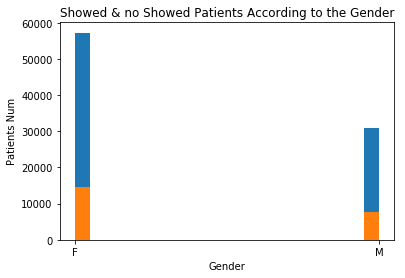

In [17]:
#Comparison Between Showed & no Showed Patients According to the Gender
A = df.Gender[show]
B = df.Gender[noshow]
plt.hist(A, alpha=1, bins=20, label='show')
plt.hist(B, alpha=1, bins=20, label='noshow')
plt.title('Showed & no Showed Patients According to the Gender')
plt.xlabel('Gender')
plt.ylabel('Patients Num')

It is obvious that the female is the most patients who attend.However, half of the patients in each gender attended and the other half do not attend. So, they are approximately close and this is not a strong variable.

### Forth Question : ( Does the Neighbourhood affect the showing of the patients?)

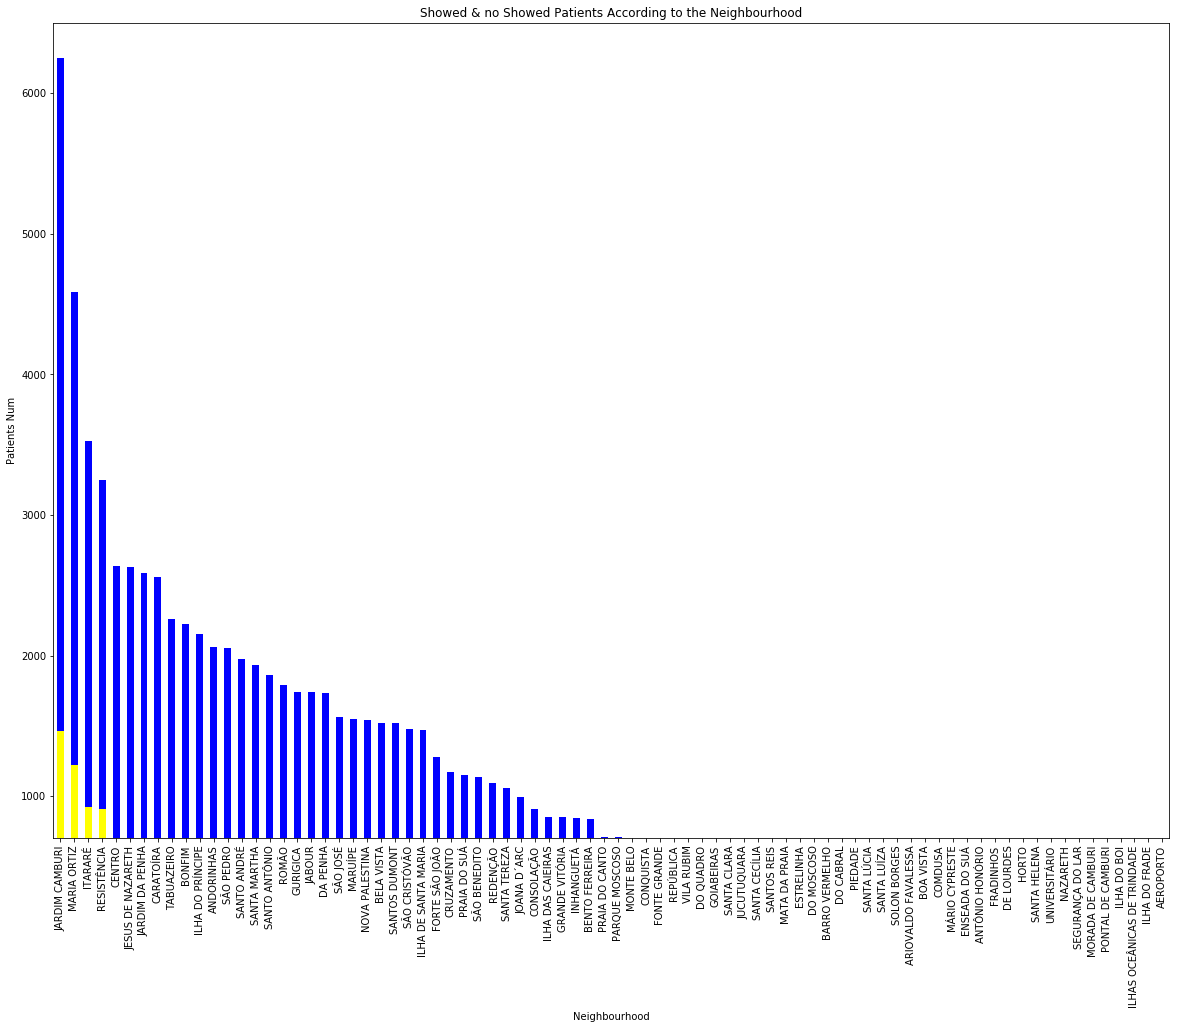

In [23]:
#Comparison Between Showed & no Showed Patients According to the Neighbourhood
plt.subplots(figsize=(20, 15))
df.Neighbourhood[show].value_counts().plot(kind='bar', color='blue', label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar', color='yellow', label='noshow')
plt.title('Showed & no Showed Patients According to the Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylim(700, 6500)
plt.ylabel('Patients Num');

It is obvious that there is one neighbourhood (Jardim Camburi) that is strongly affected the showing of the patients.

<a id='conclusions'></a>
## Conclusions

-I found out that the age, sms_received, neighbourhood and gender are four of the most independent aspects that affect the attendance of the patients.
-The children before 5 years and the 50s patients are the most who attend unlike the the above 6o years.
-I found out also that the more the patients receive the SMS, the least of them attend and it is a strange thing.
-The most showing gender is the female. 
-The Neighbourhood is a strong aspect to affect the attendance.

## Limitations:

Although we know that the most showing gender is the female but half of the patients in each gender attended and the other half did not attend. So, they are approximately close and we cannot complete the analysis in non-essential variable.

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0